In [1]:
from rmatrix import Particle, ElasticChannel, CaptureChannel, SpinGroup
import numpy as np
import matplotlib.pyplot as plt

# SAMMY full r-matrix test case

This example compares the calculation in SAMMY tr110 to the calculation by this package

The widths in the SAMMY input (which are given in meV) were divided by the penetrability calculated in this package to convert from the "effective" width used by SAMMY to the true reduced width amplitudes

In [37]:
sammy_answers = np.loadtxt("../tests/files/rbb.lst")

In [38]:
neutron = Particle('n',1,0)
gamma = Particle('g',0,0)

target = Particle("20Ne",20,10)
compound = Particle("20Ne", 20,10, Sn=6.6e6)

In [39]:
energies = np.array([1e6,1.1e6])
energy_grid = sammy_answers[:,0]*1e3

In [95]:
J = 0.5
pi = 1  # positive parity
ell = 0  #  s-wave
radius = 0.532   # *10^(-12) cm 

In [96]:
elastic_widths = np.array([1e7,1.1e7])/1e3   # widths from sammy in meV
penetrabilities = np.array([1.11567655, 1.17013143])
elastic_reduced_width_aplitudes = np.sqrt(elastic_widths/(2*penetrabilities))

In [97]:
elastic = ElasticChannel(neutron,target,J,pi,ell,radius,elastic_reduced_width_aplitudes)

In [115]:
capture_widths = np.array([1e3,1.1e3])/1e3   # widths from sammy in meV
penetrabilities = np.array([0.20489882, 0.20759486])
capture_reduced_width_amplitudes = np.sqrt(capture_widths/(2*penetrabilities))

In [116]:
capture = CaptureChannel(gamma,compound,J,pi,ell,radius,capture_reduced_width_amplitudes,0)

In [117]:
sg = SpinGroup(energies,elastic,[capture],energy_grid)

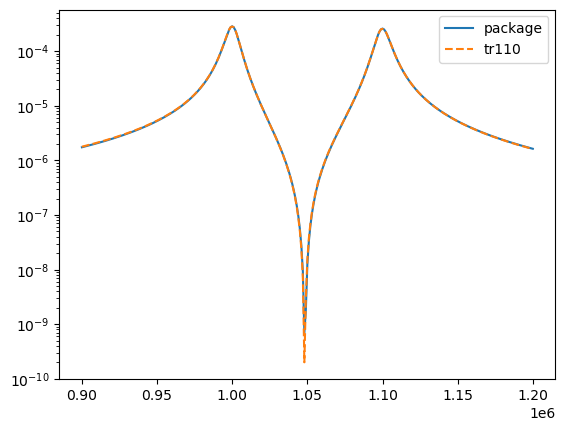

In [130]:
plt.plot(sg.energy_grid,sg.channels[1].cross_section,label="package")
plt.plot(energy_grid,sammy_answers[:,3],'--',label="tr110")
plt.yscale("log")
plt.legend()